In [25]:
import pandas as pd
%pip install matplotlib seaborn
import matplotlib as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
#Or maybe no header at all, and Pandas misinterpreted the first row as data — not column names.
df = pd.read_csv("fcc-forum-pageviews.csv", skipinitialspace=True)
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [27]:
#This is a Pandas function that converts a column (or Series) of strings (like "2016-05-09") into actual datetime64 objects — which Python and Pandas can understand as real dates.
df['date']=pd.to_datetime(df['date'],errors='coerce')#Convert 'date' column to datetime
df.set_index('date',inplace=True)# Set 'date' as the index, row index is the label used to identify each row 
df.head()



,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [28]:
# Sort the index (optional but good practice)
df.sort_index(inplace=True)


In [29]:
#STEP 2: Clean the Data (Remove Top and Bottom 2.5% Outliers)
#This means we keep only the middle 95% of the data — the part that reflects normal behavior.
#quarantile() Pandas internally sorts the column 

In [30]:
top = df['value'].quantile(0.025)
bottom=df['value'].quantile(0.975)

In [31]:
# step: Create a bar chart that shows average daily page views for each month grouped by year.


In [42]:
df_bar = df.copy()
#Add 'year' and 'month' columns
df['year']= df.index.year
df['month']= df.index.month
df['day']=df.index.day

In [43]:
# group by year and month, get average page views
yearly_avg = df.groupby('year')['value'].mean()
df.head()

,value,year,month,day
date,,,,
2016-05-09,1201,2016,5,9
2016-05-10,2329,2016,5,10
2016-05-11,1716,2016,5,11
2016-05-12,10539,2016,5,12
2016-05-13,6933,2016,5,13


In [44]:
#ploting line chart4

<Axes: title={'center': 'Page Views Over Time'}, xlabel='year'>

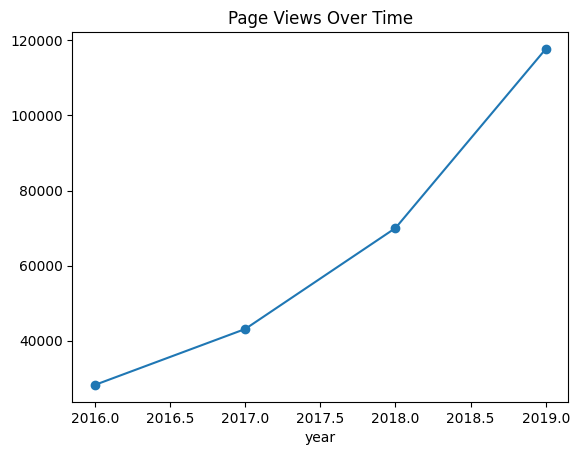

In [45]:
#df['value'],df['date'].plot(kind='line',marker='o',title='page views over time')

yearly_avg.plot(kind='line', marker='o', title='Page Views Over Time')

In [46]:
# Bar Plot (Monthly Averages by Year)

In [47]:
#visualize the data distribution over:

#Years → to show trends over time

#Months → to show seasonal variation

In [52]:
def draw_bar_plot():
    df_bar=df.copy()
    # Extract year and month from the index (which is the date)
    df_bar['year']=df_bar.index.year
    df_bar['month']=df_bar.index.month
print(df_bar.columns)
print(df_bar.head())


Index(['value', 'year', 'month', 'day'], dtype='object')
            value  year  month  day
date                               
2016-05-09   1201  2016      5    9
2016-05-10   2329  2016      5   10
2016-05-11   1716  2016      5   11
2016-05-12  10539  2016      5   12
2016-05-13   6933  2016      5   13


In [53]:
#group by year and month,then compute the average page views
df_grouped = df_bar.groupby(['year','month'])['value'].mean().unstack()

In [54]:
 # Prepare data for box plots


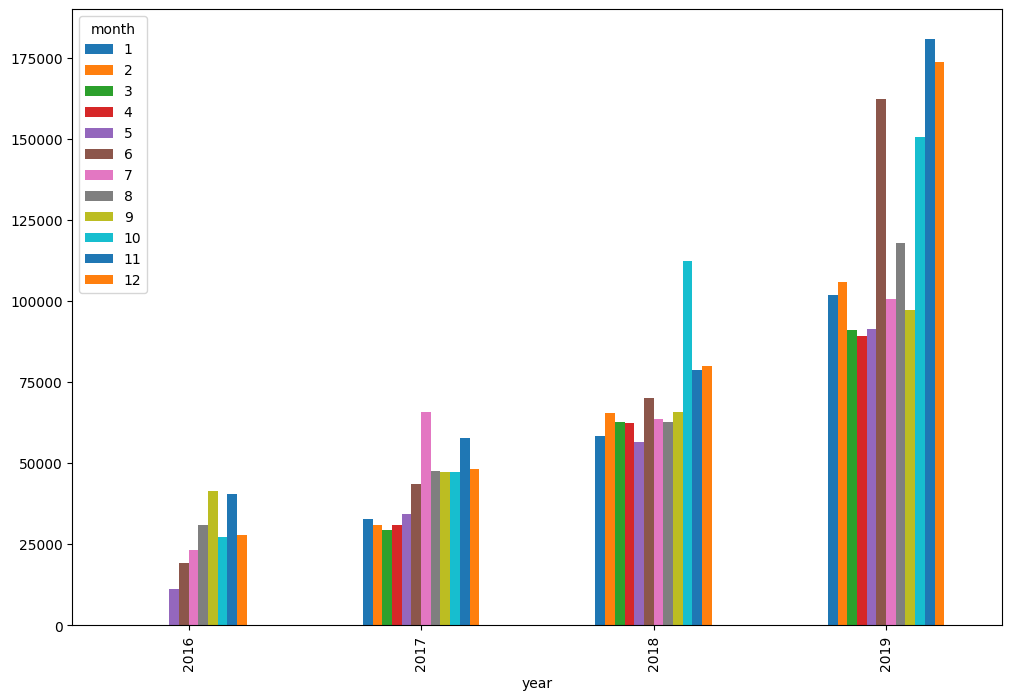

In [68]:
plt_bar = df_grouped.plot(kind='bar', figsize=(12,8))

In [74]:
import seaborn as sns

def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')

    fig, axes = plt.subplots(1, 2, figsize=(16,6))

    # Year-wise Box Plot (Trend)
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise Box Plot (Seasonality)
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    plt.tight_layout()
    plt.show()

# To display
# draw_box_plot()


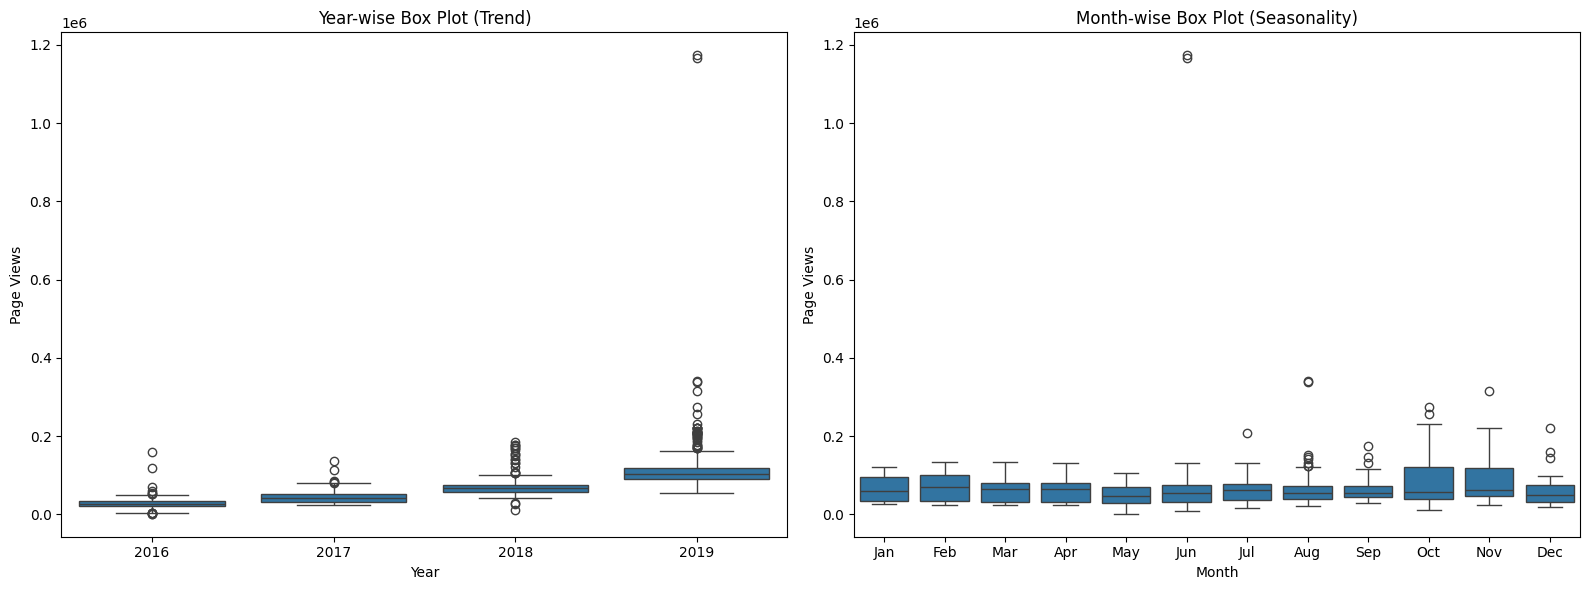

In [75]:
draw_box_plot()